## Tree Data Structure 

Ref: https://www.geeksforgeeks.org/introduction-to-tree-data-structure/

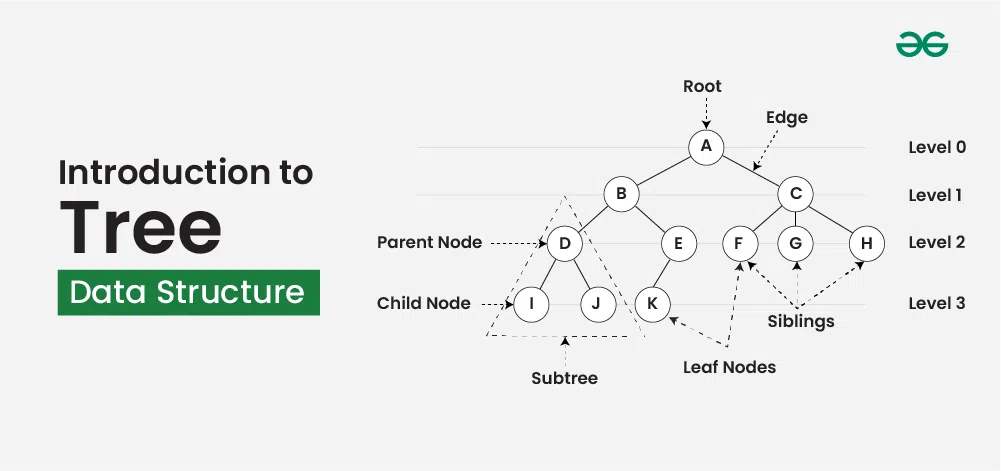


Tree data structure is a hierarchical structure that is used to represent and organize data in a way
that is easy to navigate and search. It is 
a collection of nodes that are connected by edges and has h
hierarchical relationship between the nodes. 

The topmost node of the tree is called the root, and the nodes below it are called the child nodes. ach 
node can have multiple child nodes, and 
these child nodes can also have their own child nodes, for ing a
recursive strude of the tree along with its descendant.


### Why Tree is considered a non-linear data structure?

The data in a tree are not stored in a sequential manner i.e., they are not stored linearly. Instead, they are arranged on multiple levels or we can say 
it is a hierarchical structure. For this reason, the tree is considered to be a non-linear data structure.

### Basic Terminologies In Tree Data Structure:

**Parent Node:** The node which is an immediate predecessor of a node is called the parent node of that node. 
{B} is the parent node of {D, E}.

**Child Node:** The node which is the immediate successor of a node is called the child node of that node. 
Examples: {D, E} are the child nodes of {B}.

**Root Node:** The topmost node of a tree or the node which does not have any parent node is called the root node. 
{A} is the root node of the tree. A non-empty tree must contain exactly one root node and exactly one path from the root to all other nodes of the tree.

**Leaf Node or External Node:** The nodes which do not have any child nodes are called leaf nodes. 
{I, J, K, F, G, H} are the leaf nodes of the tree.

**Ancestor of a Node:** Any predecessor nodes on the path of the root to that node are called Ancestors of that node. 
{A,B} are the ancestor nodes of the node {E}

**Descendant:** A node x is a descendant of another node y if and only if y is an ancestor of x.

**Sibling:** Children of the same parent node are called siblings. {D,E} are called siblings.

**Level of a node:** The count of edges on the path from the root node to that node. The root node has level 0.

**Internal node:** A node with at least one child is called Internal Node.

**Neighbour of a Node:** Parent or child nodes of that node are called neighbors of that node.

**Subtree:** Any node of the tree along with its descendant.

### Representation of a Node in Tree Data Structure:

In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.children = []

## Types of Tree data structures:
    - classified into three types based upon the number of children each node of the tree can have.

### Binary Tree: 
    - Each node can have maximum of two children 
    - Common types include 
        * Full Binary Trees
        * Complete Binary Trees
        * Balanced Binary Trees
        * Degenerate or pathological Binary Trees
    - Examples 
        * Binary Search Tree
        * Binary Heap 
### Ternary Tree
    - a non-linear datastructure in which each node has atmost three chld nodes. 
    - usually denoted as left, mid and right 

### N-ary or generic Tree
    - area collection of nodes where each node is a datastructure that consists of records and a list of references to its children 
    - duplicate refrences are not allowed
    - unlike linked list, each node stores the address of multiple nodes. 

References:
https://www.geeksforgeeks.org/types-of-trees-in-data-structures
https://www.geeksforgeeks.org/ternary-tree
https://www.geeksforgeeks.org/generic-treesn-array-trees

## Basic Operations of a Tree Data Structure 

**Create -** create a tree in the data structure 
**Insert -** Inserts data in a tree
**Search -** Searches specific data in a tree to check whether it is present or not
**Traversal:**
    **- Depth-First-Search Traversal**
    **- Breadth-First-Search Traversal** 

## Properties of Tree Data Structure:
    

Number of edges: An edge can be defined as the connection between two nodes. If a tree has N nodes then it will have (N-1) edges. There is only one path from each node to any other node of the tree.
        
Depth of a node: The depth of a node is defined as the length of the path from the root to that node. Each edge adds 1 unit of length to the path. So, it can also be defined as the number of edges in the path from the root of the tree to the no    de.

Height of a node: The height of a node can be defined as the length of the longest path from the node to a leaf node of the     tree.

Height of the Tree: The height of a tree is the length of the longest path from the root of the tree to a leaf node of th    e tree.

Degree of a Node: The total count of subtrees attached to that node is called the degree ofthe node. 
The degree of a leaf node must be 0. The degree of a tree is the maximum degree of a node a ong all the
nodes in the tree.

## Implementation of Tree Data Structure

### Basic Implementation

In [ ]:
import sys

# Node structure for tree
class Node:
    def __init__(self, x):
        self.data = x
        self.children = []

# Function to add a child to a node
def addChild(parent, child):
    parent.children.append(child)

# Function to print parent of each node
def printParents(node, parent):
    """
    if parent is None:
        print("{}->Root".format(node))
    else:
        print("{}->{}".format(node, parent))
    """
    if parent is None:
        print (str(node.data) + " -> Null")
    else:
        print (str(node.data) + " -> " + str(parent.data))

    for child in node.children:
        printParents(child, node)

# Function to print children of each node
def printChildren(node):
    children_str = " ".join([str(child.data) for child in node.children])
    print (str(node.data) + " -> " + children_str)
    for child in node.children:
        printChildren(child)

# Function to print degrees of each node
def printDegrees(node, parent):
    degree = len(node.children)
    if parent is None:
        degree += 1
    print (str(node.data) + " -> " + str(degree))
    for child in node.children:
        printChildren(child)

if __name__ == "__main__":
    # creating nodes
    root = Node(1)
    n2 = Node(2)
    n3 = Node(3)
    n4 = Node(4)
    n5 = Node(5)

    # now construct a tree
    addChild(root, n2)
    addChild(root, n3)
    addChild(n2, n4)
    addChild(n2, n5)

    print (f"Parents")





### Implementation using Queue

In [2]:


from collections import deque

# Function to add an edge between vertices x and y
def addEdge(x, y, adj):
    adj[x].append(y)
    adj[y].append(x)

# Function to print the parent of each node
def printParents(node, adj, parent):
    # current node is Root, thus, has no parent
    if parent == 0:
        print("{}->Root".format(node))
    else:
        print("{}->{}".format(node, parent))

    # Using DFS
    for cur in adj[node]:
        if cur != parent:
            printParents(cur, adj, node)

# Function to print the children of each node
def printChildren(Root, adj):
    # Queue for the BFS
    q = deque()
    # pushing the root
    q.append(Root)
    # visit array to keep track of nodes that have been
    # visited
    vis = [0] * len(adj)
    # BFS
    while q:
        node = q.popleft()
        vis[node] = 1
        print("{}->".format(node)),
        for cur in adj[node]:
            if vis[cur] == 0:
                print(cur),
                q.append(cur)
        print()

# Function to print the leaf nodes
def printLeafNodes(Root, adj):
    # Leaf nodes have only one edge and are not the root
    for i in range(1, len(adj)):
        if len(adj[i]) == 1 and i != Root:
            print(i),

# Function to print the degrees of each node
def printDegrees(Root, adj):
    for i in range(1, len(adj)):
        print(i, ":"),
        # Root has no parent, thus, its degree is equal to
        # the edges it is connected to
        if i == Root:
            print(len(adj[i]))
        else:
            print(len(adj[i]) - 1)

# Driver code
N = 7
Root = 1
# Adjacency list to store the tree
adj = [[] for _ in range(N + 1)]
# Creating the tree
addEdge(1, 2, adj)
addEdge(1, 3, adj)
addEdge(1, 4, adj)
addEdge(2, 5, adj)
addEdge(2, 6, adj)
addEdge(4, 7, adj)

# Printing the parents of each node
print("The parents of each node are:")
printParents(Root, adj, 0)

# Printing the children of each node
print("The children of each node are:")
printChildren(Root, adj)

# Printing the leaf nodes in the tree
print("The leaf nodes of the tree are:")
printLeafNodes(Root, adj)

# Printing the degrees of each node
print("The degrees of each node are:")
printDegrees(Root, adj)


The parents of each node are:
1->Root
2->1
5->2
6->2
3->1
4->1
7->4
The children of each node are:
1->
2
3
4

2->
5
6

3->

4->
7

5->

6->

7->

The leaf nodes of the tree are:
3
5
6
7
The degrees of each node are:
1 :
3
2 :
2
3 :
0
4 :
1
5 :
0
6 :
0
7 :
0


https://www.geeksforgeeks.org/introduction-to-binary-tree/

- How to test whether a tree is Binary Tree

- 

## Binary Tree 

- is a non-linear data structure, where each node hass atmost two nodes 

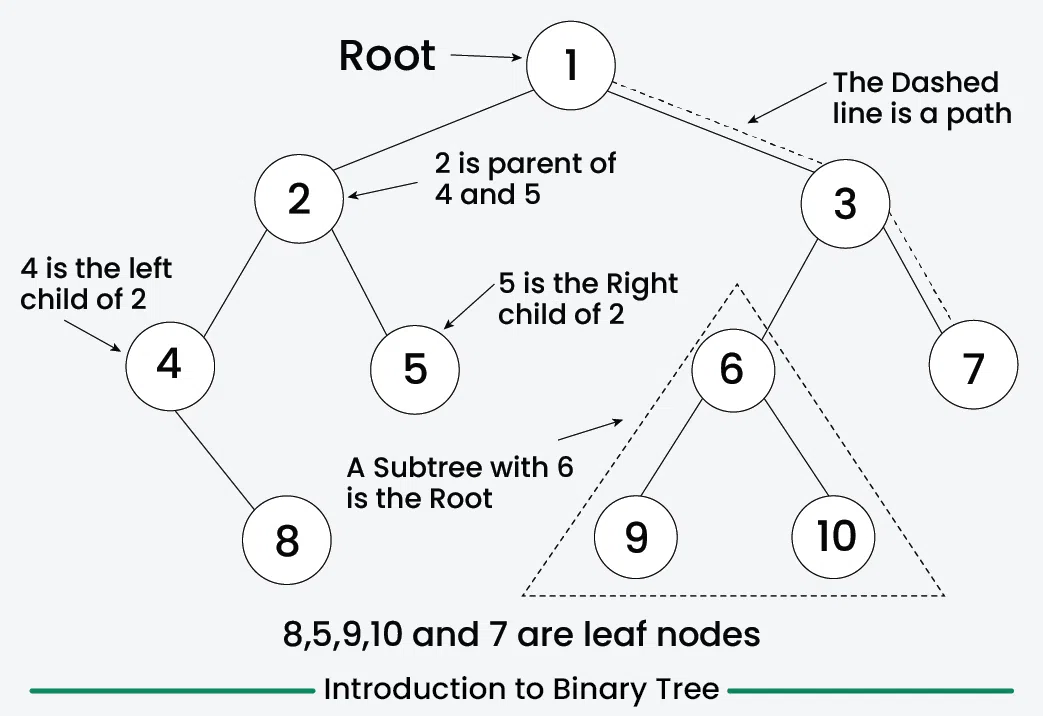

### What is a BInary Tree?

- is a tree data structure (non-linear), each node can have atmost two children